In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

# Tools for splitting data into train/test sets and performing hyperparameter optimization
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, KFold

# LabelEncoder: converts categorical labels into numbers; StandardScaler: normalizes data
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Metrics for evaluating model performance
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


from sklearn.ensemble import RandomForestClassifier



In [3]:
spotify_tracks = pd.read_csv('spotify_tracks.csv')
spotify_tracks.head()

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


In [4]:
# List all unique values in the 'track_genre'
spotify_tracks['track_genre'].unique()

array(['acoustic', 'afrobeat', 'alt-rock', 'alternative', 'ambient',
       'anime', 'black-metal', 'bluegrass', 'blues', 'brazil',
       'breakbeat', 'british', 'cantopop', 'chicago-house', 'children',
       'chill', 'classical', 'club', 'comedy', 'country', 'dance',
       'dancehall', 'death-metal', 'deep-house', 'detroit-techno',
       'disco', 'disney', 'drum-and-bass', 'dub', 'dubstep', 'edm',
       'electro', 'electronic', 'emo', 'folk', 'forro', 'french', 'funk',
       'garage', 'german', 'gospel', 'goth', 'grindcore', 'groove',
       'grunge', 'guitar', 'happy', 'hard-rock', 'hardcore', 'hardstyle',
       'heavy-metal', 'hip-hop', 'honky-tonk', 'house', 'idm', 'indian',
       'indie-pop', 'indie', 'industrial', 'iranian', 'j-dance', 'j-idol',
       'j-pop', 'j-rock', 'jazz', 'k-pop', 'kids', 'latin', 'latino',
       'malay', 'mandopop', 'metal', 'metalcore', 'minimal-techno', 'mpb',
       'new-age', 'opera', 'pagode', 'party', 'piano', 'pop-film', 'pop',
       'pow

In [5]:
spotify_tracks['track_genre'].value_counts()

track_genre
acoustic       1000
afrobeat       1000
alt-rock       1000
alternative    1000
ambient        1000
               ... 
techno         1000
trance         1000
trip-hop       1000
turkish        1000
world-music    1000
Name: count, Length: 114, dtype: int64

In [6]:
# Filter dataset to include only selected genres
spotify_tracks = spotify_tracks[spotify_tracks['track_genre'].isin(['pop', 'country', 'hip-hop', 'punk_rock', 'latin', 'edm'])]

In [7]:
# Drop unnecessary columns from the dataset
spotify_tracks.drop(columns=['Unnamed: 0', 'track_id', 'track_name', 'artists', 'album_name', 'time_signature'], axis=1, inplace=True)

In [8]:
print(spotify_tracks.isnull().sum())
spotify_tracks.dropna(inplace=True)

popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
track_genre         0
dtype: int64


In [9]:
# Separate features (X) and target labels (y)
X, y = spotify_tracks.loc[ : , (spotify_tracks.columns != 'track_genre')], spotify_tracks['track_genre']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

In [10]:
# Initialize LabelEncoder to convert genre labels to numbers
label_encoder = LabelEncoder()

# Fit the label encoder on the training labels and transform all sets
y_train = label_encoder.fit_transform(y_train)
y_val = label_encoder.transform(y_val)
y_test = label_encoder.transform(y_test)

In [11]:
# Initialize StandardScaler to normalize the feature data
scaler = StandardScaler()

# Fit the scaler on the training data and transform all sets
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

In [12]:
# Initialize the Random Forest Classifier with a fixed random state for reproducibility
rf_model = RandomForestClassifier(random_state=42)

rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_val)

test_accuracy = accuracy_score(y_val, y_pred)
print(f'Test Accuracy: {test_accuracy:.4f}')
print('\nClassification Report: \n', classification_report(y_val, y_pred))
print('\nConfusion Matrix: \n', confusion_matrix(y_val, y_pred))


Test Accuracy: 0.7000

Classification Report: 
               precision    recall  f1-score   support

           0       0.79      0.83      0.81       186
           1       0.76      0.74      0.75       220
           2       0.67      0.61      0.64       223
           3       0.65      0.69      0.67       178
           4       0.63      0.64      0.64       193

    accuracy                           0.70      1000
   macro avg       0.70      0.70      0.70      1000
weighted avg       0.70      0.70      0.70      1000


Confusion Matrix: 
 [[155  12   5   2  12]
 [ 12 162  16  11  19]
 [  6  14 136  34  33]
 [ 19   5  22 123   9]
 [  5  20  25  19 124]]


In [ ]:
# Hyperparameter tuning using GridSearchCV
param_grid = {
    'n_estimators': [10, 100, 200, 300], # Number of trees in the forest
    'max_depth': [3, 5, 10, 20, None],
    'max_features':['sqrt', 'log2', None], # Number of features to consider at each split
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

rf_model = RandomForestClassifier(random_state=42)

# Perform grid search with cross-validation
grid_search = GridSearchCV(rf_model, param_grid, cv=10, scoring='accuracy', n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

best_rf = grid_search.best_estimator_

print('Best parameters:', grid_search.best_params_)
print('Best score:', grid_search.best_score_)



Fitting 10 folds for each of 360 candidates, totalling 3600 fits


In [ ]:
feature_importance = best_rf.feature_importances_ # Get feature importances from the best model
feature_names = X.columns # Get the names of the features (columns) from the dataset used for training

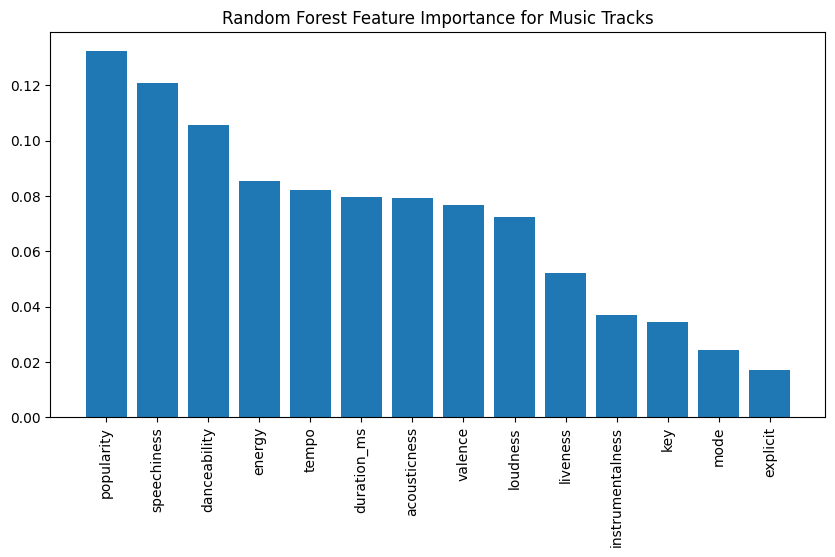

In [ ]:
#Sort and plot the feature importances
sorted_indices = np.argsort(feature_importance)[::-1]
plt.figure(figsize=(10, 5))
plt.bar(range(len(feature_importance)), feature_importance[sorted_indices], align='center')
plt.xticks(range(len(feature_importance)), np.array(feature_names)[sorted_indices], rotation=90)
plt.title('Random Forest Feature Importance for Music Tracks')
plt.show()
